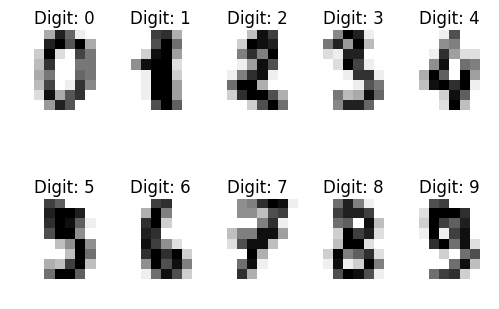

Accuracy:
 0.881118881119
Confusion matrix:
 [[61 14]
 [ 3 65]]
Precision:
 0.953125
Recall:
 0.813333333333
F-measure:
 0.877697841727


In [1]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 手書き数字データの読み込み
digits = datasets.load_digits()

# 画像を 2 行 5 列に表示
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

# 3 と 8 のデータ位置を求める
flag_3_8 = (digits.target == 3) + (digits.target == 8)

# 3 と 8 のデータを取得
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

# 3 と 8 の画像データを 1 次元化
images = images.reshape(images.shape[0], -1)

# 分類器の生成
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)
classifier = ensemble.RandomForestClassifier(n_estimators=20, max_depth=3, criterion="gini")
classifier.fit(images[:train_size], labels[:train_size])

# 分類器の性能の確認
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:\n',
      accuracy_score(expected, predicted))
print('Confusion matrix:\n',
      confusion_matrix(expected, predicted))
print('Precision:\n',
      precision_score(expected, predicted, pos_label=3))
print('Recall:\n',
      recall_score(expected, predicted, pos_label=3))
print('F-measure:\n',
      f1_score(expected, predicted, pos_label=3))
